In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
import datetime as dt

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)

['measurement', 'station']

# Reflect Tables into SQLAlchemy ORM

In [8]:
# reflect an existing database into a new model

# reflect the tables


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)



, ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.16), ('2016-12-18', 0.27), ('2016-12-19', 0.02), ('2016-12-20', 0.01), ('2016-12-21', 0.06), ('2016-12-22', 0.14), ('2016-12-23', 0.02), ('2016-12-24', 0.06), ('2016-12-25', 0.0), ('2016-12-26', 0.06), ('2016-12-27', 0.0), ('2016-12-28', 0.06), ('2016-12-29', 0.05), ('2016-12-30', 0.07), ('2017-01-01', None), ('2017-01-03', None), ('2017-01-04', 0.18), ('2017-01-05', 0.42), ('2017-01-06', 0.01), ('2017-01-07', 0.0), ('2017-01-08', 0.0), ('2017-01-09', 0.0), ('2017-01-10', 0.0), ('2017-01-12', None), ('2017-01-15', None), ('2017-01-16', 0.0), ('2017-01-18', None), ('2017-01-19', 0.0), ('2017-01-20', 0.0), ('2017-01-21', 0.11), ('2017-01-22', 0.04), ('2017-01-23', 0.0), ('2017-01-24', 0.08), ('2017-01-25', 0.0), ('2017-01-26', 0.0), ('2017-01-27', 0.0), ('2017-01-29', None), ('2017-01-30', 0.0), ('2017-01-31', 0.0), ('2017-02-01', 0.0), ('2017-02-02', 0.0), ('2017-02-03', 0.0), ('2017-02-04', 0.0), ('2017-02-05', 0.0), ('2017-0

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipatation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()



7-10           0.00
 2017-07-11           0.00
 2017-07-12           0.00
 2017-07-13           0.11
 2017-07-14           0.00
 2017-07-15           0.00
 2017-07-16           0.00
 2017-07-17           0.00
 2017-07-18           0.00
 2017-07-19           0.00
 2017-07-20           0.33
 2017-07-21           0.00
 2017-07-22           0.00
 2017-07-24            NaN
 2017-07-25           0.05
 2017-07-26           0.00
 2017-07-27           0.00
 2017-07-28           0.00
 2017-07-29           0.00
 2017-07-30           0.00
 2017-07-31           0.00
 2017-08-01           0.00
 2017-08-02           0.00
 2017-08-03           0.00
 2017-08-04           0.00
 2017-08-06           0.00
 2017-08-07           0.00
 2017-08-08           0.00
 2017-08-10           0.00
 2017-08-11           0.00
 2017-08-12           0.00
 2017-08-13           0.00
 2017-08-14           0.08
 2017-08-15           0.06
 2017-08-16           0.07
 2017-08-17           0.05
 2017-08-19            NaN
 2017-08

<AxesSubplot:xlabel='date'>

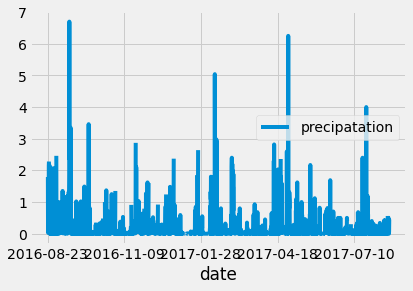

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#9.2.5

In [16]:

df.describe()

,precipatation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [30]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [35]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [38]:
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


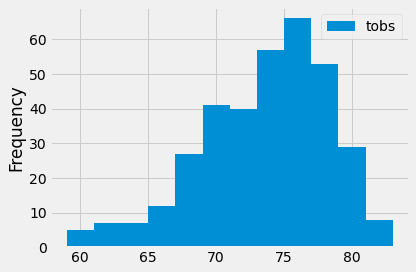

In [42]:
df.plot.hist(bins=12)
plt.tight_layout()

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [20]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge